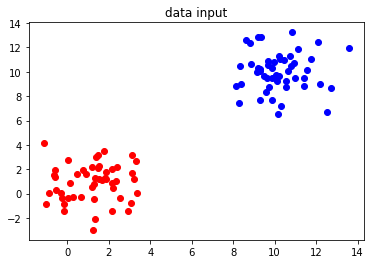

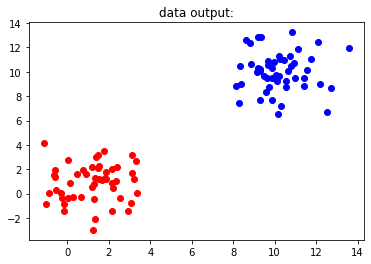


Confusion Matrix:
             predict cluster 1 predict cluster 2
Is cluster 1           50          0
Is cluster 2           0         50
Precision : 1.0
Recall: 1.0

The weight:[ 0.7570849150274537 0.5690173282928859 -7.11707202990714 ]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

class neuron:
    def __init__(self):
        self.weight[]
        self.bias
        self.a_z

def sinmoid_fun(w,x):
    ans=0
    for i in range(len(w)):
        ans+=w[i]*x[i]
    re=1/(1+math.exp(-ans))

    return re

def L2norm(data_arr,w):
    y_arr=[num[-1] for num in data_arr]
    w_diff=[0,0,0]
    max_error=0.0
    for i in range(len(data_arr)):
        mx=sinmoid_fun(w,data_arr[i])

        for j in range(len(w)):
            data_arr[i][4]=abs(y_arr[i]-mx)

            if data_arr[i][4]> max_error:
                max_error=data_arr[i][4]

            w_diff[j]+=(y_arr[i]-mx)*mx*(1-mx)*data_arr[i][j]

    return w_diff,max_error

def Cross_Entropy(data_arr,w):
    y_arr=[num[-1] for num in data_arr]
    w_diff=[0.0,0.0,0.0]
    max_error=0.0

    for i in range(len(data_arr)):
        mx=sinmoid_fun(w,data_arr[i])
        #print("mx:",mx,"true",data_arr[i][-1])
        data_arr[i][4]=abs(y_arr[i]-mx)

        if data_arr[i][4] > max_error:
            max_error=data_arr[i][4]

        for j in range(len(w_diff)):
            w_diff[j]+=(y_arr[i]-mx)*data_arr[i][j]

    for j in range(len(w_diff)):
        w_diff[j] /= len(data_arr)

    return w_diff,max_error


fp=open('Logistic_data1-1.txt',"r")
fp2=open('Logistic_data1-2.txt',"r")

p_arr=[]
n_arr=[]
arr=[]
line=fp.readline()
while line:
    line=line.strip('\n').split(',')
    line.append(0)
    p_arr.append(line)
    arr.append(line)
    line=fp.readline()
line=fp2.readline()
while line:
    line=line.strip('\n').split(',')
    line.append(1)
    n_arr.append(line)
    arr.append(line)
    line=fp2.readline()

x_positive_arr=[float(num[0]) for num in p_arr ]
x_negative_arr=[float(num[0]) for num in n_arr]
y_positive_arr=[float(num[1]) for num in p_arr]
y_negative_arr=[float(num[1]) for num in n_arr]

plt.title("data input")
plt.plot(x_positive_arr,y_positive_arr,'o',color='red')
plt.plot(x_negative_arr,y_negative_arr,'o',color='blue')
plt.show(block=False)

w_vector=[0.5,0.5,0.5]

data_arr=[[float(num[0]) ,float(num[1]),1]for num in arr]

for i in range(len(data_arr)):
    re=sinmoid_fun(w_vector,data_arr[i])
    if re>=0.5:
        data_arr[i].append(1)
    else :
        data_arr[i].append(0)
    data_arr[i].append(abs(arr[i][-1]-re))
    data_arr[i].append(arr[i][-1])

#***************constant set
learn_rate=0.02
method_flag=0
max_error=0.0

for i in range(10000):
    if method_flag==0:
        w_diff,max_error=L2norm(data_arr,w_vector)
    else:
        w_diff,max_error=Cross_Entropy(data_arr,w_vector)
    
    if max_error<0.001:
        break
    for j in range(len(w_vector)):
        w_vector[j] +=learn_rate*w_diff[j]
        
for i in range(len(data_arr)):
    re=sinmoid_fun(w_vector,data_arr[i])
    if re>0.5:
        data_arr[i][3]=1
    else:
        data_arr[i][3]=0

out_pos_x_arr=[num[0] for num in data_arr if num[3]==0]
out_pos_y_arr=[num[1] for num in data_arr if num[3]==0]
out_neg_x_arr=[num[0] for num in data_arr if num[3]==1]
out_neg_y_arr=[num[1] for num in data_arr if num[3]==1]

plt.title("data output:")
plt.plot(out_pos_x_arr,out_pos_y_arr,'o',color='red')
plt.plot(out_neg_x_arr,out_neg_y_arr,'o',color='blue')
plt.show()

tp=0;fp=0;fn=0;tn=0
for i in range(len(data_arr)):
    if data_arr[i][3]==0:
        if data_arr[i][-1]==0:
            tp+=1
        else:
            fp+=1
    else:
        if data_arr[i][-1]==0:
            fn+=1
        else:
            tn+=1

print("\nConfusion Matrix:\n             predict cluster 1 predict cluster 2")
print('Is cluster 1          ',tp,"        ",fp)
print('Is cluster 2          ',fn,"       ",tn)
print("Precision :",tp/(tp+fp))
print("Recall:" ,tp/(tp+fn))
print("\nThe weight:[",w_vector[0],w_vector[1],w_vector[2],"]")